# Tech Maven #

**Primarily, this notebook will collect all the EDA I've done so far and set about looking at the different TS Analysis I could do**

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import percentages of job postings on naukri featuring ai/ml
naukri = pd.read_csv('./cleaned_data/naukri_pct.csv')

# import reddit post/comments featuring ai/ml
ml_red = pd.read_csv('./cleaned_data/reddit_ML.csv').drop("Unnamed: 0", 1)
ai_red = pd.read_csv('./cleaned_data/reddit_AI.csv').drop("Unnamed: 0", 1)

# import arXiv papers featuring ai/ml
arx = pd.read_csv("./cleaned_data/combined_arX.csv")

#import google search data (normalized) on ai/ml
google = pd.read_csv('./data/googleMLAI.csv')

#import wiki page vews on ai/ml
wiki = pd.read_csv('./data/wikiMLAI.csv')

#import newsAPI articles (going back 1 month :/ ) on ai/ml
news = pd.read_csv('./cleaned_data/news_10_02.csv')

In [3]:
# combine each DF into a Series with Date: Ammount(count/%/Normalized etc)
#naukri job postings
naukri = naukri.set_index('date') #leave off on filling NaNs just yet

In [ ]:
# reddit
ml_red['day']=pd.to_datetime(ml_red['day'])
ai_red['day']=pd.to_datetime(ai_red['day'])
ml_red.set_index('day', inplace=True)
ai_red.set_index('day', inplace=True)
reddit_pre= ml_red.join(ai_red,how="outer", rsuffix="_ai").fillna(0)
reddit = reddit_pre['total']+reddit_pre['total_ai']
# reddit.head()

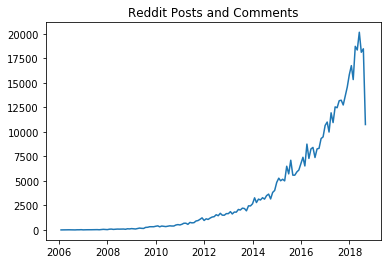

In [9]:
plt.plot(reddit.resample('M').sum());
plt.title('Reddit Posts and Comments');

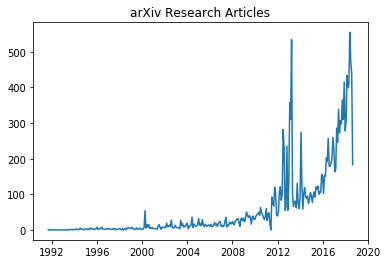

In [5]:
#arXiv
arx['date']= pd.DatetimeIndex(pd.to_datetime(arx['date'])).normalize()

arx.set_index('date', inplace=True)

arx = arx.resample('D').count()[['source']] #Store the number of articles per day


plt.plot(arx.resample('M').sum())
plt.title('arXiv Research Articles');

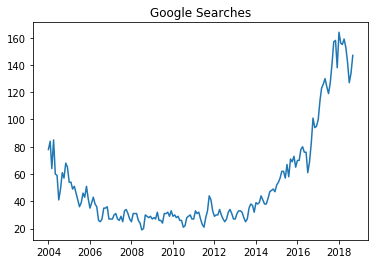

In [6]:
#Google
google['Month'] = pd.to_datetime(google['Month'])
google.set_index('Month', inplace=True)
google['Total'] = google['Artificial Intelligence: (United States)'] + google['Machine learning: (United States)']
# google[['Total']].head()

plt.plot(google['Total'])
plt.title('Google Searches');

Text(0.5, 1.0, 'Wikipedia Page Views')

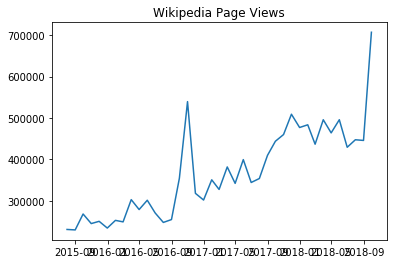

In [7]:
#Wikipedia
wiki
wiki['Date'] = pd.to_datetime(wiki['Date'])
wiki.set_index('Date', inplace=True)
wiki['Total'] = wiki['Artificial intelligence'] + wiki['Machine learning']

plt.plot(wiki.resample('M').sum()['Total'])
plt.title('Wikipedia Page Views');

Text(0.5, 1.0, 'News Articles since September')

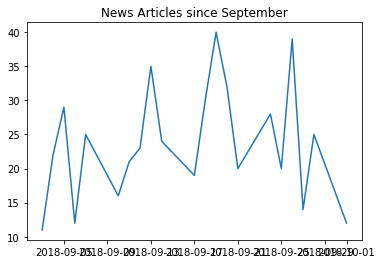

In [8]:
# News API
news['date'] = pd.to_datetime(news['date'])
news.set_index('date', inplace= True)

plt.plot(news.resample('B').count()['source'])
plt.title('News Articles since September');